In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("myneta.csv")
df.describe()
# df.to_csv('test_neta.csv',index=False)


,Sno .,Criminal Cases,Age,Is State,Zone
count,8337.000000,8337.000000,8337.000000,0.0,0.0
mean,285.825117,0.678661,47.787933,NaN,NaN
std,253.094175,4.460992,11.973695,NaN,NaN
min,1.000000,0.000000,25.000000,NaN,NaN
25%,92.000000,0.000000,38.000000,NaN,NaN
50%,208.000000,0.000000,47.000000,NaN,NaN
75%,411.000000,0.000000,56.000000,NaN,NaN
max,1119.000000,243.000000,88.000000,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sno .           8337 non-null   int64  
 1   Candidate       8337 non-null   object 
 2   Party           8337 non-null   object 
 3   Criminal Cases  8337 non-null   int64  
 4   Education       8337 non-null   object 
 5   Age             8337 non-null   int64  
 6   Total Assets    6697 non-null   object 
 7   Liabilities     6684 non-null   object 
 8   State           8337 non-null   object 
 9   Is State        0 non-null      float64
 10  Zone            0 non-null      float64
dtypes: float64(2), int64(3), object(6)
memory usage: 716.6+ KB


In [4]:
def remove_estimation(value):
    # Split the string by '~' and keep the part before it
    if value.startswith('Rs'):
            value = value.replace('Rs', '').strip()
    return value.split('~')[0].strip()


# Apply the function to the 'numbers' column
df['Total Assets'] = df['Total Assets'].astype(str)
df['Total Assets'] = df['Total Assets'].apply(remove_estimation)


df['Liabilities'] = df['Liabilities'].astype(str)
df['Liabilities'] = df['Liabilities'].apply(remove_estimation)

df.head()

,Sno .,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,State,Is State,Zone
0,1,Anand Ramnath Arlekar,IND,0,10th Pass,58,"8,43,025","13,36,346",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN
1,2,Bishnu Pada Ray,BJP,0,Graduate,73,"2,74,39,170","3,02,788",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN
2,3,D Ayyappan,CPI(M),0,Post Graduate,60,"1,32,87,710","26,49,000",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN
3,4,Dr Arun Kumar Mallik,BSP,0,Post Graduate,64,"11,18,72,135",0,ANDAMAN AND NICOBAR ISLANDS,NaN,NaN
4,5,K J B Selvaraj,AIADMK,0,Graduate,50,nan,nan,ANDAMAN AND NICOBAR ISLANDS,NaN,NaN


In [5]:
import pandas as pd

# Define the data
data = {
    "State": ["West Bengal", "Uttarakhand", "Uttar Pradesh", "Tripura", "Telangana", "Tamil Nadu", 
                                "Sikkim", "Rajasthan", "Punjab", "Puducherry", "Odisha", "Nagaland", "Mizoram", 
                                "Meghalaya", "Manipur", "Maharashtra", "Madhya Pradesh", "Lakshadweep", "Ladakh", 
                                "Kerala", "Karnataka", "Jharkhand", "Jammu and Kashmir", "India", "Himachal Pradesh", 
                                "Haryana", "Gujarat", "Goa", "Delhi", "Dadra and Nagar Haveli and Daman and Diu", 
                                "Chhattisgarh", "Chandigarh", "Bihar", "Assam", "Arunachal Pradesh", "Andhra Pradesh", 
                                "ANDAMAN AND NICOBAR ISLANDS"],
    "Region": ["Eastern", "Northern", "Northern", "Northeastern", "Southern", "Southern", "Northeastern", "Western", 
               "Northern", "Southern", "Eastern", "Northeastern", "Northeastern", "Northeastern", "Northeastern", 
               "Western", "Central", "Arabian Sea", "Northern", "Southern", "Southern", "Eastern", "Northern", "", 
               "Northern", "Northern", "Western", "Western", "Northern", "Western", "Central", "Northern", "Eastern", 
               "Northeastern", "Northeastern", "Southern", "Bay of Bengal"]
}
for key in data:
    if type(data[key]) == type([]):
        for index, item in enumerate(data[key]):
            data[key][index] = item.upper();

# Create DataFrame
region_df = pd.DataFrame(data)

# region_df.to_csv("region.csv",index=False)

In [6]:
# region_df.columns

In [7]:
# Merge the DataFrames on the State column
merged_df = pd.merge(df, region_df, left_on='State', right_on='State', how='left')

# Rename columns if necessary
merged_df = merged_df.rename(columns={'Region': 'Zone'})
merged_df.to_csv("inter.csv",index=False)

In [8]:
merged_df.head()

,Sno .,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,State,Is State,Zone,Zone
0,1,Anand Ramnath Arlekar,IND,0,10th Pass,58,"8,43,025","13,36,346",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL
1,2,Bishnu Pada Ray,BJP,0,Graduate,73,"2,74,39,170","3,02,788",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL
2,3,D Ayyappan,CPI(M),0,Post Graduate,60,"1,32,87,710","26,49,000",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL
3,4,Dr Arun Kumar Mallik,BSP,0,Post Graduate,64,"11,18,72,135",0,ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL
4,5,K J B Selvaraj,AIADMK,0,Graduate,50,nan,nan,ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL


In [9]:
df_inter = pd.read_csv("inter.csv")
df_inter.head()

,Sno .,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,State,Is State,Zone,Zone.1
0,1,Anand Ramnath Arlekar,IND,0,10th Pass,58,"8,43,025","13,36,346",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL
1,2,Bishnu Pada Ray,BJP,0,Graduate,73,"2,74,39,170","3,02,788",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL
2,3,D Ayyappan,CPI(M),0,Post Graduate,60,"1,32,87,710","26,49,000",ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL
3,4,Dr Arun Kumar Mallik,BSP,0,Post Graduate,64,"11,18,72,135",0,ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL
4,5,K J B Selvaraj,AIADMK,0,Graduate,50,NaN,NaN,ANDAMAN AND NICOBAR ISLANDS,NaN,NaN,BAY OF BENGAL


In [10]:
df_inter.drop(columns=['Zone'], inplace=True)  # Drop the 'Zone' column
df_inter.rename(columns={'Zone.1': 'Zone'}, inplace=True)  # Rename 'Zone.1' to 'Zone'

In [11]:
df_inter.head()

,Sno .,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,State,Is State,Zone
0,1,Anand Ramnath Arlekar,IND,0,10th Pass,58,"8,43,025","13,36,346",ANDAMAN AND NICOBAR ISLANDS,NaN,BAY OF BENGAL
1,2,Bishnu Pada Ray,BJP,0,Graduate,73,"2,74,39,170","3,02,788",ANDAMAN AND NICOBAR ISLANDS,NaN,BAY OF BENGAL
2,3,D Ayyappan,CPI(M),0,Post Graduate,60,"1,32,87,710","26,49,000",ANDAMAN AND NICOBAR ISLANDS,NaN,BAY OF BENGAL
3,4,Dr Arun Kumar Mallik,BSP,0,Post Graduate,64,"11,18,72,135",0,ANDAMAN AND NICOBAR ISLANDS,NaN,BAY OF BENGAL
4,5,K J B Selvaraj,AIADMK,0,Graduate,50,NaN,NaN,ANDAMAN AND NICOBAR ISLANDS,NaN,BAY OF BENGAL


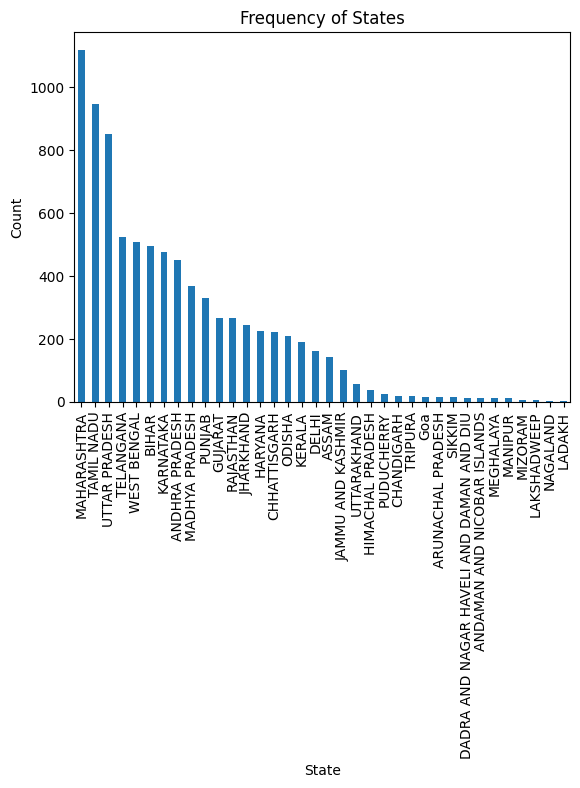

In [12]:
state_counts = df_inter["State"].value_counts()

# Plot the value counts
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Frequency of States')
plt.show()


In [13]:
states_to_check = ["ANDAMAN AND NICOBAR ISLANDS", "CHANDIGARH", "DADRA AND NAGAR HAVELI AND DAMAN AND DIU", "DELHI", "JAMMU AND KASHMIR", "LADAKH", "LAKSHADWEEP", "PUDUCHERRY"]

df_inter['Is State'] = df_inter['State'].map(lambda x: 0 if any(state in x for state in states_to_check) else 1)


In [14]:
df_inter.head()

,Sno .,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,State,Is State,Zone
0,1,Anand Ramnath Arlekar,IND,0,10th Pass,58,"8,43,025","13,36,346",ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL
1,2,Bishnu Pada Ray,BJP,0,Graduate,73,"2,74,39,170","3,02,788",ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL
2,3,D Ayyappan,CPI(M),0,Post Graduate,60,"1,32,87,710","26,49,000",ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL
3,4,Dr Arun Kumar Mallik,BSP,0,Post Graduate,64,"11,18,72,135",0,ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL
4,5,K J B Selvaraj,AIADMK,0,Graduate,50,NaN,NaN,ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL


In [15]:
winner_df = pd.read_csv("test_neta.csv")
winner_df.head()

,Sno,Candidate,Constituency,Party,Criminal Case,Education,Total Assets,Liabilities
0,1,Bapu Rao Soyam,ADILABAD,BJP,52,12th Pass,"Rs 30,99,414\n~ 30 Lacs+","Rs 2,31,450\n~ 2 Lacs+"
1,2,Satyapal Singh Baghel,AGRA,BJP,5,Doctorate,"Rs 7,42,74,036\n~ 7 Crore+","Rs 86,06,522\n~ 86 Lacs+"
2,3,Patel Hasmukhbhai Somabhai,AHMEDABAD EAST,BJP,0,Others,"Rs 7,46,99,690\n~ 7 Crore+","Rs 62,52,577\n~ 62 Lacs+"
3,4,Dr. Solanki Kiritbhai,AHMEDABAD WEST,BJP,0,Post Graduate,"Rs 8,94,74,039\n~ 8 Crore+",Rs 0\n~
4,5,Sujay Radhakrishna Vikhe,AHMEDNAGAR,BJP,0,Doctorate,NaN,NaN


In [16]:
# Extract candidate names from both DataFrames
names_df1 = set(df_inter['Candidate'])
names_df2 = set(winner_df['Candidate'])

# Map names and mark winners
winners = {name: 1 if name in names_df1 else 0 for name in names_df2}

# Add a new column 'Is Winner' to df_inter based on the winners dictionary
df_inter['Is Winner'] = df_inter['Candidate'].map(winners)

# Fill NaN values with 0
df_inter['Is Winner'].fillna(0, inplace=True)

# Print df2 to see the result
df_inter.head()

,Sno .,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,State,Is State,Zone,Is Winner
0,1,Anand Ramnath Arlekar,IND,0,10th Pass,58,"8,43,025","13,36,346",ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL,0.0
1,2,Bishnu Pada Ray,BJP,0,Graduate,73,"2,74,39,170","3,02,788",ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL,0.0
2,3,D Ayyappan,CPI(M),0,Post Graduate,60,"1,32,87,710","26,49,000",ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL,0.0
3,4,Dr Arun Kumar Mallik,BSP,0,Post Graduate,64,"11,18,72,135",0,ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL,0.0
4,5,K J B Selvaraj,AIADMK,0,Graduate,50,NaN,NaN,ANDAMAN AND NICOBAR ISLANDS,0,BAY OF BENGAL,0.0


In [17]:
df_inter["Is Winner"] = df_inter["Is Winner"].astype(int)
df_inter["Is Winner"].value_counts()

0    8095
1     242
Name: Is Winner, dtype: int64

In [18]:
df_inter.to_csv("final_data.csv",index=False)

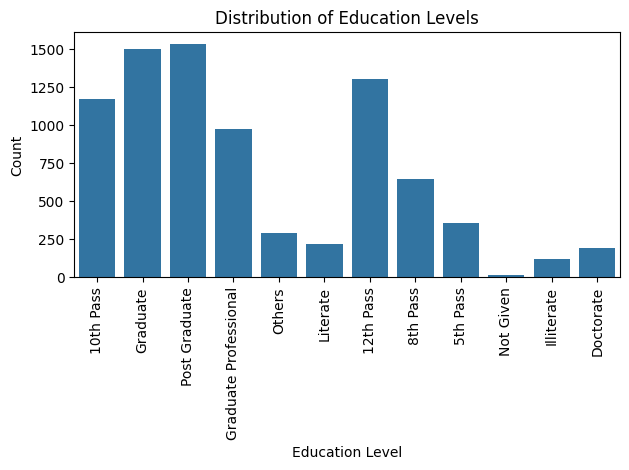

In [19]:
# Assuming df is your DataFrame containing the 'Education' and 'Party' columns
sns.countplot(x='Education', data=df_inter)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if necessary
plt.tight_layout()
plt.show()

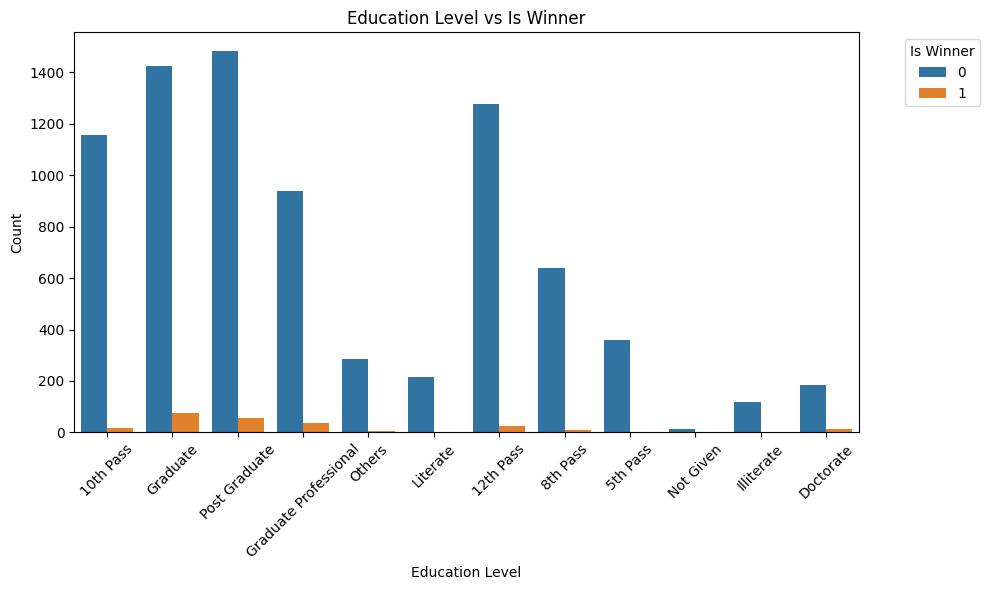

In [20]:
# Assuming df is your DataFrame containing the 'Education' and 'Is Winner' columns
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='Education', hue='Is Winner', data=df_inter)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs Is Winner')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if necessary
plt.legend(title='Is Winner', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot
plt.tight_layout()
plt.show()

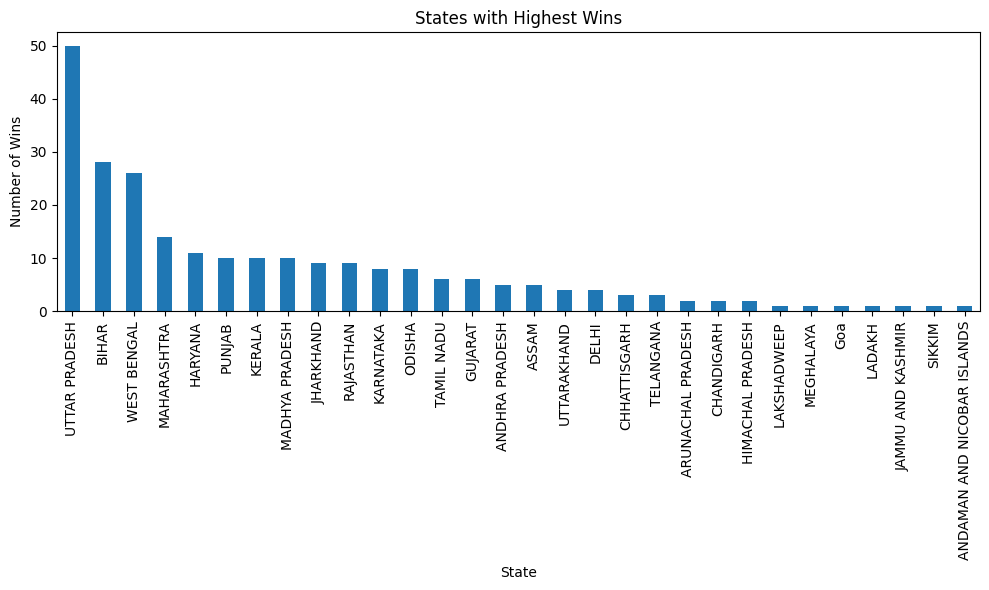

In [21]:
winning_states = df_inter[df_inter['Is Winner'] == 1]['State']

# Count the occurrences of each state
state_wins = winning_states.value_counts()

# Plot the states with the highest wins
plt.figure(figsize=(10, 6))
state_wins.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Wins')
plt.title('States with Highest Wins')
plt.xticks(rotation=90)  # Rotate x-labels for better readability if necessary
plt.tight_layout()
plt.show()

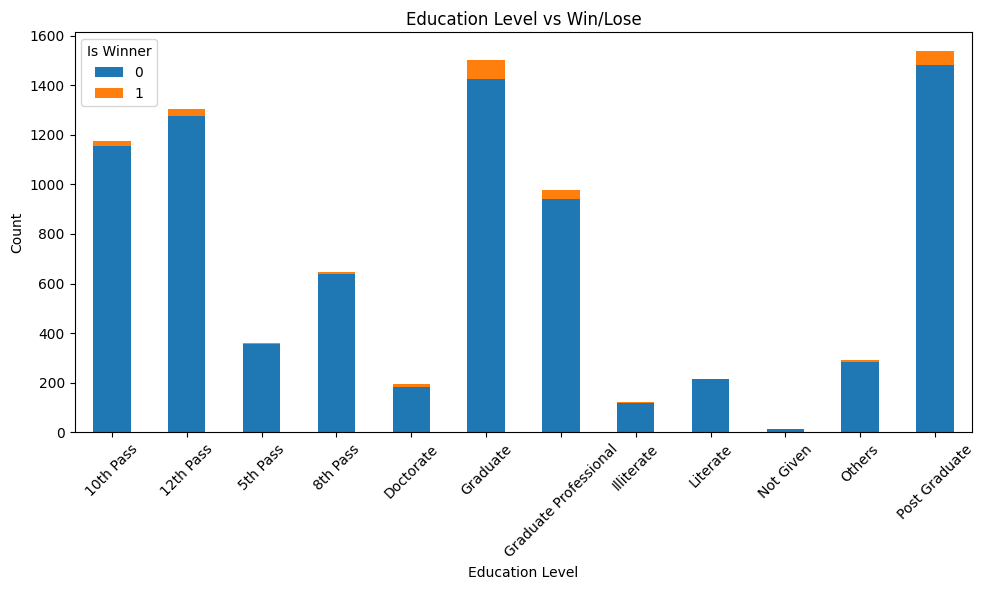

In [22]:
education_win_count = df_inter.groupby(['Education', 'Is Winner']).size().unstack(fill_value=0)

# Plot a stacked bar chart
education_win_count.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level vs Win/Lose')

# Rotate x-labels for better readability if necessary
plt.xticks(rotation=45)

# Set legend
plt.legend(title='Is Winner')

# Show plot
plt.tight_layout()
plt.show()

In [23]:
label_encoder = LabelEncoder()
df_inter['Education'] = label_encoder.fit_transform(df_inter['Education'])

# Next, apply one-hot encoding on the other categorical columns
categorical_cols = ['Party', 'State', 'Zone']
df_inter = pd.get_dummies(df_inter, columns=categorical_cols)
df_inter.head()

,Sno .,Candidate,Criminal Cases,Education,Age,Total Assets,Liabilities,Is State,Is Winner,Party_AAP,...,State_UTTARAKHAND,State_WEST BENGAL,Zone_ARABIAN SEA,Zone_BAY OF BENGAL,Zone_CENTRAL,Zone_EASTERN,Zone_NORTHEASTERN,Zone_NORTHERN,Zone_SOUTHERN,Zone_WESTERN
0,1,Anand Ramnath Arlekar,0,0,58,"8,43,025","13,36,346",0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,Bishnu Pada Ray,0,5,73,"2,74,39,170","3,02,788",0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,D Ayyappan,0,11,60,"1,32,87,710","26,49,000",0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,Dr Arun Kumar Mallik,0,11,64,"11,18,72,135",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,K J B Selvaraj,0,5,50,NaN,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
df_inter.drop(columns=['Sno .'], inplace=True)
df_inter.drop(columns=['Candidate'], inplace=True)

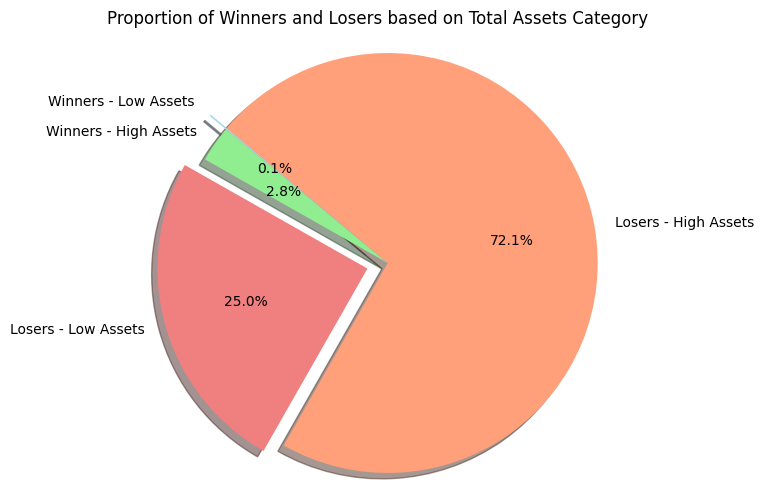

In [25]:
# Define a threshold value to categorize total assets
threshold = 1000000  # For example, assets below this threshold are considered "Low", and above are considered "High"

# Categorize total assets into "Low" and "High"
df_inter['Total Assets'] = df_inter['Total Assets'].replace('Nil', np.nan)
df_inter['Total Assets'] = df_inter['Total Assets'].str.replace(',', '').astype(float)
df_inter['Asset Category'] = df_inter['Total Assets'].apply(lambda x: 'Low' if x < threshold else 'High')

# Count the number of winners and losers in each category
winners_low_assets = len(df_inter[(df_inter['Is Winner'] == 1) & (df_inter['Asset Category'] == 'Low')])
winners_high_assets = len(df_inter[(df_inter['Is Winner'] == 1) & (df_inter['Asset Category'] == 'High')])
losers_low_assets = len(df_inter[(df_inter['Is Winner'] == 0) & (df_inter['Asset Category'] == 'Low')])
losers_high_assets = len(df_inter[(df_inter['Is Winner'] == 0) & (df_inter['Asset Category'] == 'High')])

# Create a pie chart
labels = ['Winners - Low Assets', 'Winners - High Assets', 'Losers - Low Assets', 'Losers - High Assets']
sizes = [winners_low_assets, winners_high_assets, losers_low_assets, losers_high_assets]
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']
explode = (0.1, 0, 0.1, 0)  # explode the slices for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Winners and Losers based on Total Assets Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Wealth and Election Outcomes:

##### Null Hypothesis (H0): There is no difference in mean total assets between winners and losers.
##### Alternative Hypothesis (H1): There is a difference in mean total assets between winners and losers.

In [26]:


# Replace 'Nil' with NaN
df_inter['Total Assets'] = df_inter['Total Assets'].replace('Nil', np.nan).astype(float)
df_inter['Total Assets'].fillna(0, inplace=True)
# Separate winners and losers
winners_assets = df_inter[df_inter['Is Winner'] == 1]['Total Assets']
losers_assets = df_inter[df_inter['Is Winner'] == 0]['Total Assets']

# Perform t-test
t_stat, p_value = ttest_ind(winners_assets, losers_assets, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("p-value:", p_value)

# Set significance level
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 3.2864900711204332
p-value: 0.0011515736870632842
Reject the null hypothesis


### Verdict - Money matters
#### we have evidence to suggest that winning candidates tend to have a different average level of total assets compared to losing candidates. This information can be valuable for understanding the relationship between wealth and election outcomes.

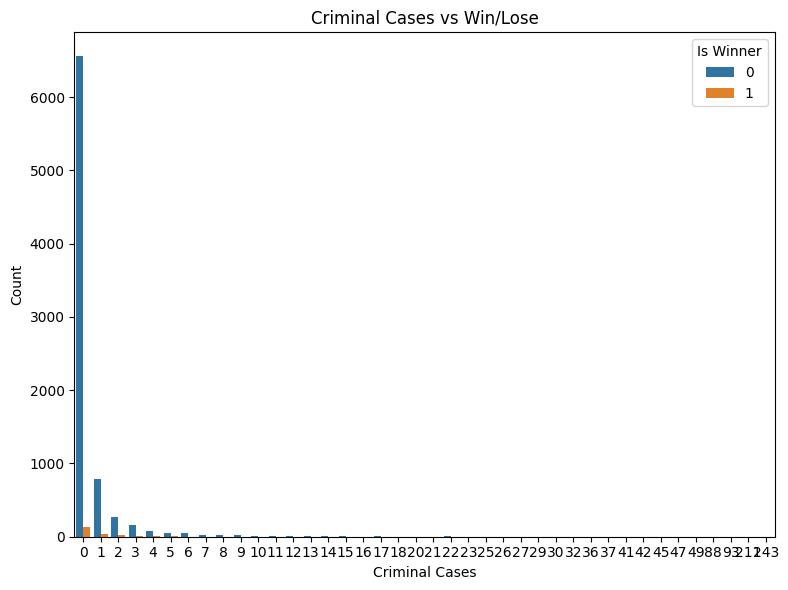

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot criminal cases vs win/lose
plt.figure(figsize=(8, 6))
sns.countplot(x='Criminal Cases', hue='Is Winner', data=df_inter)
plt.xlabel('Criminal Cases')
plt.ylabel('Count')
plt.title('Criminal Cases vs Win/Lose')
plt.legend(title='Is Winner')
plt.tight_layout()
plt.show()


#### Impact of Criminal Cases on Election Outcomes:

##### Null Hypothesis (H0): 'Criminal Cases' is a significant predictor of election outcomes.
##### Alternative Hypothesis (H1): 'Criminal Cases' is not a significant predictor of election outcomes.

In [28]:
import statsmodels.api as sm

# Perform logistic regression analysis
X = sm.add_constant(df_inter['Criminal Cases'])
y = df_inter['Is Winner']
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Extract p-value for 'Criminal Cases'
p_value_criminal_cases = result.pvalues['Criminal Cases']

# Set significance level
alpha = 0.05

# Check if p-value is less than alpha
if p_value_criminal_cases < alpha:
    print("Reject the null hypothesis: 'Criminal Cases' is a significant predictor of election outcomes.")
else:
    print("Fail to reject the null hypothesis: 'Criminal Cases' is not a significant predictor of election outcomes.")


Optimization terminated successfully.
         Current function value: 0.130771
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Is Winner   No. Observations:                 8337
Model:                          Logit   Df Residuals:                     8335
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                0.004361
Time:                        21:04:56   Log-Likelihood:                -1090.2
converged:                       True   LL-Null:                       -1095.0
Covariance Type:            nonrobust   LLR p-value:                  0.001998
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.5307      0.066    -53.611      0.000      -3.660      -3.402
Criminal Cases   

#### Verdict - criminal cases is a statistically significant predictor of election outcomes, with each additional criminal case being associated with a slight increase in the log-odds of winning the election.

#### Relationship between Age and Winning Elections:
#### Null hypothesis: Age has no effect on winning elections
#### Alternative hypothesis: Age has an effect on winning elections

In [29]:
import statsmodels.api as sm

# Perform logistic regression analysis
X = sm.add_constant(df_inter['Age'])
y = df_inter['Is Winner']
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Extract p-value for 'Age'
p_value_age = result.pvalues['Age']

# Set significance level
alpha = 0.05



# Check if p-value is less than alpha
if p_value_age < alpha:
    print("Reject the null hypothesis: Age has an effect on winning elections.")
else:
    print("Fail to reject the null hypothesis: Age has no effect on winning elections.")


Optimization terminated successfully.
         Current function value: 0.125482
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Is Winner   No. Observations:                 8337
Model:                          Logit   Df Residuals:                     8335
Method:                           MLE   Df Model:                            1
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                 0.04464
Time:                        21:04:57   Log-Likelihood:                -1046.1
converged:                       True   LL-Null:                       -1095.0
Covariance Type:            nonrobust   LLR p-value:                 4.735e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2497      0.308    -20.268      0.000      -6.854      -5.645
Age            0.0532      0.

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Define age groups
bins = [0, 30, 40, 50, 60, 70, np.inf]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
df_inter['Age Group'] = pd.cut(df_inter['Age'], bins=bins, labels=labels, right=False)

# Create dummy variables for each age group
age_dummies = pd.get_dummies(df_inter['Age Group'], drop_first=True)

# Perform logistic regression analysis
X = sm.add_constant(age_dummies)
y = df_inter['Is Winner']
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

# Extract p-values for each age group
p_values = result.pvalues

# Set significance level
alpha = 0.05

# Check if p-values are less than alpha
for group in age_dummies.columns:
    p_value = p_values[group]
    if p_value < alpha:
        print(f"Reject the null hypothesis for age group {group}: This age group has an effect on winning elections.")
    else:
        print(f"Fail to reject the null hypothesis for age group {group}: This age group has no effect on winning elections.")


Optimization terminated successfully.
         Current function value: 0.125329
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Is Winner   No. Observations:                 8337
Model:                          Logit   Df Residuals:                     8331
Method:                           MLE   Df Model:                            5
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                 0.04580
Time:                        21:04:57   Log-Likelihood:                -1044.9
converged:                       True   LL-Null:                       -1095.0
Covariance Type:            nonrobust   LLR p-value:                 4.572e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9102      0.579     -8.474      0.000      -6.046      -3.774
30-39          0.3427      0.

#### Verdict - 
##### Age group 30-39: This age group has no effect on winning elections.
##### Age group 40-49: This age group has no effect on winning elections.
##### Age group 50-59: This age group has an effect on winning elections.
##### Age group 60-69: This age group has an effect on winning elections.
##### Age group 70+: This age group has an effect on winning elections.

In [31]:
df_inter.head()

,Criminal Cases,Education,Age,Total Assets,Liabilities,Is State,Is Winner,Party_AAP,Party_AARAKSHAN VIRODHI PARTY,Party_AIADMK,...,Zone_ARABIAN SEA,Zone_BAY OF BENGAL,Zone_CENTRAL,Zone_EASTERN,Zone_NORTHEASTERN,Zone_NORTHERN,Zone_SOUTHERN,Zone_WESTERN,Asset Category,Age Group
0,0,0,58,843025.0,"13,36,346",0,0,0,0,0,...,0,1,0,0,0,0,0,0,Low,50-59
1,0,5,73,27439170.0,"3,02,788",0,0,0,0,0,...,0,1,0,0,0,0,0,0,High,70+
2,0,11,60,13287710.0,"26,49,000",0,0,0,0,0,...,0,1,0,0,0,0,0,0,High,60-69
3,0,11,64,111872135.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,High,60-69
4,0,5,50,0.0,NaN,0,0,0,0,1,...,0,1,0,0,0,0,0,0,High,50-59


In [32]:
df_inter['Liabilities'] = df_inter['Liabilities'].str.replace(',', '').astype(float)

In [33]:
df_inter['Asset Category'] = df_inter['Asset Category'].apply(lambda x: 1 if x == "High" else 0)

In [34]:
df_inter.drop(columns=['Age Group'], inplace=True)

In [35]:
df_inter.isna().all()

Criminal Cases       False
Education            False
Age                  False
Total Assets         False
Liabilities          False
                     ...  
Zone_NORTHEASTERN    False
Zone_NORTHERN        False
Zone_SOUTHERN        False
Zone_WESTERN         False
Asset Category       False
Length: 802, dtype: bool

In [36]:
df_inter['Liabilities'].fillna(0, inplace=True)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure df_inter has the 'Is Winner' column and it's clean
df_inter = df_inter.dropna(subset=['Is Winner'])

# Define the features and target variable
X = df_inter.drop(columns=['Is Winner'])
y = df_inter['Is Winner']

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply scaling to the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

# Combine the scaled features and target variable back into the training and testing DataFrames
train_df = pd.concat([X_train_scaled_df, y_train], axis=1)
test_df = pd.concat([X_test_scaled_df, y_test], axis=1)

In [38]:
# Check for NaN values in the training and testing sets
print("Number of NaN values in each column of training set:\n", train_df.isna().sum())
print("Number of NaN values in each column of testing set:\n", test_df.isna().sum())

Number of NaN values in each column of training set:
 Criminal Cases    0
Education         0
Age               0
Total Assets      0
Liabilities       0
                 ..
Zone_NORTHERN     0
Zone_SOUTHERN     0
Zone_WESTERN      0
Asset Category    0
Is Winner         0
Length: 802, dtype: int64
Number of NaN values in each column of testing set:
 Criminal Cases    0
Education         0
Age               0
Total Assets      0
Liabilities       0
                 ..
Zone_NORTHERN     0
Zone_SOUTHERN     0
Zone_WESTERN      0
Asset Category    0
Is Winner         0
Length: 802, dtype: int64


In [39]:
model_param = {
    'LogisticRegression':{
        'model' : LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'param' : {
            'penalty': ('l1', 'l2'),
            'C':[0.01, 0.1, 1, 10]
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'max_depth': [3, 5]
        }
    },
    'KNeighborsClassifier':{
        'model': KNeighborsClassifier(),
        'param':{
            'n_neighbors':[5,25]
        }
    },
    'SVC':{
        'model': SVC(),
        'param': {
            'C':[10,100]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'param' : {
            'n_estimators': [1000,3000]
        }
    },
    'AdaBoostClassifier':{
        'model': ensemble.AdaBoostClassifier(),
        'param':{
            "n_estimators": [1,100],
            'learning_rate':[.001,.1]
        }
    },
    'XGBClassifier':{
        'model' : XGBClassifier(),
        'param':{
            'min_child_weight': [5, 10],
            'gamma': [0.5, 1],
            'subsample': [0.6, 1.0],
            'colsample_bytree': [0.6, 1.0],
            'max_depth': [3, 5]
        }
    },
    'lgb':{
        'model':lgb.LGBMClassifier(),
        'param':{
                 }
    }
}

In [40]:
import warnings
warnings.filterwarnings('ignore')

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train_scaled,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
    print(model_selection)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ('l1', 'l2')})
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5]})
GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 25]})
GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [10, 100]})
GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1000, 3000]})
GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.1],
                         'n_estimators': [1, 100]})
GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                  

In [44]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,LogisticRegression,0.970910,"{'C': 0.01, 'penalty': 'l1'}"
1,DecisionTreeClassifier,0.970610,{'max_depth': 3}
2,KNeighborsClassifier,0.970910,{'n_neighbors': 25}
3,SVC,0.969111,{'C': 10}
4,random_forest,0.968812,{'n_estimators': 1000}
5,AdaBoostClassifier,0.970910,"{'learning_rate': 0.001, 'n_estimators': 1}"
6,XGBClassifier,0.971060,"{'colsample_bytree': 0.6, 'gamma': 1, 'max_dep..."
7,lgb,0.967162,{}


In [45]:
model_xgb = XGBClassifier(colsample_bytree= 1.0,gamma= 1,max_depth= 5,min_child_weight= 5,subsample= 0.8)

In [46]:
model_xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
# Make predictions on the test data
predictions = model_xgb.predict(X_test_scaled)

# Add the predictions as a new column to the test DataFrame
X_test['Result_2024'] = predictions


In [48]:
X_test.head()

,Criminal Cases,Education,Age,Total Assets,Liabilities,Is State,Party_AAP,Party_AARAKSHAN VIRODHI PARTY,Party_AIADMK,Party_AITC,...,Zone_ARABIAN SEA,Zone_BAY OF BENGAL,Zone_CENTRAL,Zone_EASTERN,Zone_NORTHEASTERN,Zone_NORTHERN,Zone_SOUTHERN,Zone_WESTERN,Asset Category,Result_2024
1178,0,1,28,185000.0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4931,0,11,45,40049264.0,5708458.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4582,0,1,52,88159766.0,30346543.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5646,0,1,42,2050000.0,950000.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1883,0,10,69,47743570.0,400000.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [49]:
# Print the rows where Result_2024 is 1
winning_predictions = X_test[X_test['Result_2024'] == 1]

In [50]:
winning_predictions["Zone_NORTHERN"].value_counts()

0    10
1     8
Name: Zone_NORTHERN, dtype: int64

In [51]:
winning_predictions.to_csv("Final_results.csv",index=False)

In [53]:
party_columns = [col for col in winning_predictions.columns if col.startswith('Party_')]
party_counts = winning_predictions[party_columns].sum().sort_values(ascending=False)

print(party_counts)


Party_BJP                          14
Party_INC                           2
Party_AITC                          1
Party_BSP                           1
Party_AAP                           0
                                   ..
Party_Ekam Sanatan Bharat Dal       0
Party_Eklavya Samaj Party           0
Party_Gana Suraksha Party           0
Party_Ganasangam Party of India     0
Party_Zoram Peoples Movement        0
Length: 750, dtype: int64
